<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Valeria Zuñiga &bull; 07 de diciembre 2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, f1_score

---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [49]:
# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data'

# Asignar nombres de columnas
columnas = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
df.columns = columnas
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [50]:
# Número y nombre de los atributos
print("\nNúmero de atributos:", df.shape[1])
print("Nombre de los atributos:")
print(df.columns.tolist())

# Número de filas del conjunto de datos.
print("\nNúmero de filas:", df.shape[0])

# Verificar "missing values" y en qué columnas.
print("\nMissing values por columna:")
print(df.isnull().sum())


Número de atributos: 14
Nombre de los atributos:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Número de filas: 506

Missing values por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


El dataset no contiene mising values.

---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


Frecuencia de CHAS:
CHAS
0    471
1     35
Name: count, dtype: int64 

Frecuencia relativa (%):
CHAS
0    93.083004
1     6.916996
Name: proportion, dtype: float64

Gráfico de barras:


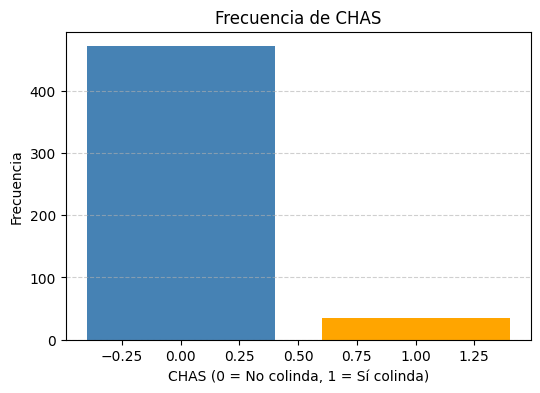

In [51]:
# VARIABLES CATEGÓRICAS
# Frecuencia de CHAS
print("Frecuencia de CHAS:")
print(df["CHAS"].value_counts(), "\n")

print("Frecuencia relativa (%):")
print(df["CHAS"].value_counts(normalize=True)*100)

# Gráfico de barras

frecuencias = df["CHAS"].value_counts()
print("\nGráfico de barras:")
plt.figure(figsize=(6,4))
plt.bar(frecuencias.index, frecuencias.values, color=["steelblue", "orange"])
plt.title("Frecuencia de CHAS")
plt.xlabel("CHAS (0 = No colinda, 1 = Sí colinda)")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

Estadísticos descriptivos de variables numéricas:

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   1

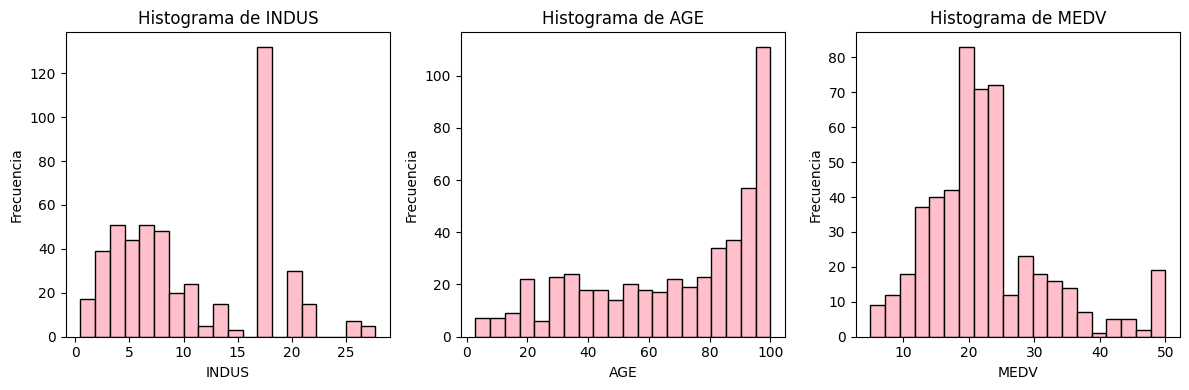

In [52]:
# VARIABLES CUANTITATIVAS
# Estadísticos descriptivos para variables numéricas
print("Estadísticos descriptivos de variables numéricas:\n")
print(df.describe())

# Histogramas de INDUS, AGE y MEDV usando plt.hist()

variables = ["INDUS", "AGE", "MEDV"]

plt.figure(figsize=(12,4))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    plt.hist(df[var], bins=20, color="pink", edgecolor="black")
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


**1. Variable categórica: CHAS**

La mayoría de las viviendas no colindan con el río Charles.
Solo alrededor del 7% están cerca del río (CHAS = 1).
Esto significa que es un atributo muy desequilibrado, y probablemente tendrá un impacto limitado en algunos modelos, aunque sigue siendo relevante porque puede relacionarse con precios más altos.

**2. Estadísticos descriptivos de variables numéricas**

Los valores descriptivos muestran cómo se distribuyen las características de las viviendas:

- RM (habitaciones) tiene un promedio de ~6.2 habitaciones, lo que indica viviendas de tamaño medio.

- LSTAT (porcentaje de población de menor estatus social) tiene variabilidad importante, lo cual sugiere diferencias socioeconómicas fuertes entre zonas.

- MEDV, que es el precio de las casas, tiene una media de unos 22.5k dólares y llega hasta un máximo de 50k, lo que muestra que hay zonas con viviendas mucho más costosas.

**3. Histogramas (INDUS, AGE, MEDV)**

- INDUS: muestra una distribución bastante dispersa, con muchas zonas en niveles medios de desarrollo industrial.

- AGE: está sesgada hacia valores altos, lo que indica que la mayoría de las viviendas fueron construidas hace muchos años.

- MEDV: tiene una distribución algo asimétrica; la mayoría de casas se concentran entre 15k y 25k, con menos viviendas en los rangos altos. Esto sugiere un mercado concentrado en precios medios.

### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

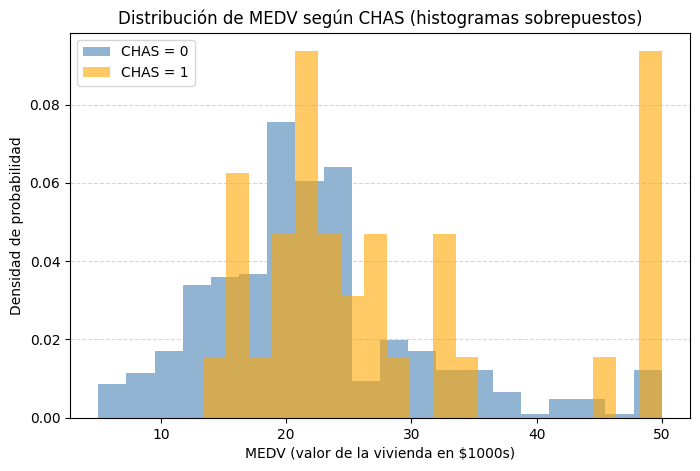

In [53]:
# Histograma de MEDV

# Dividir MEDV según clase CHAS
medv_chas_0 = df[df["CHAS"] == 0]["MEDV"]
medv_chas_1 = df[df["CHAS"] == 1]["MEDV"]

plt.figure(figsize=(8,5))

# Histograma para CHAS = 0
plt.hist(
    medv_chas_0,
    bins=20,
    color="steelblue",
    alpha=0.6,
    density=True,
    label="CHAS = 0"
)

# Histograma para CHAS = 1
plt.hist(
    medv_chas_1,
    bins=20,
    color="orange",
    alpha=0.6,
    density=True,
    label="CHAS = 1"
)

plt.title("Distribución de MEDV según CHAS (histogramas sobrepuestos)")
plt.xlabel("MEDV (valor de la vivienda en $1000s)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

A partir de los histogramas, se observa que CHAS podría tener cierta influencia
en la predicción de MEDV, ya que las viviendas ubicadas cerca del río (CHAS = 1) tienden a concentrarse en precios más altos y muestran mayor densidad en valores entre 20k y 30k, e incluso en los máximos cercanos a 50k, mientras que las viviendas que no colindan con el río presentan una distribución más estable en rangos intermedios. Aunque el grupo CHAS = 1 es pequeño, el patrón sugiere que la cercanía al río está asociada a precios superiores, por lo que este atributo podría aportar información al modelo.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [54]:
correlaciones_medv = df.corr()["MEDV"].sort_values(ascending=False)

print("Correlación de cada atributo con MEDV:\n")
print(correlaciones_medv)

Correlación de cada atributo con MEDV:

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


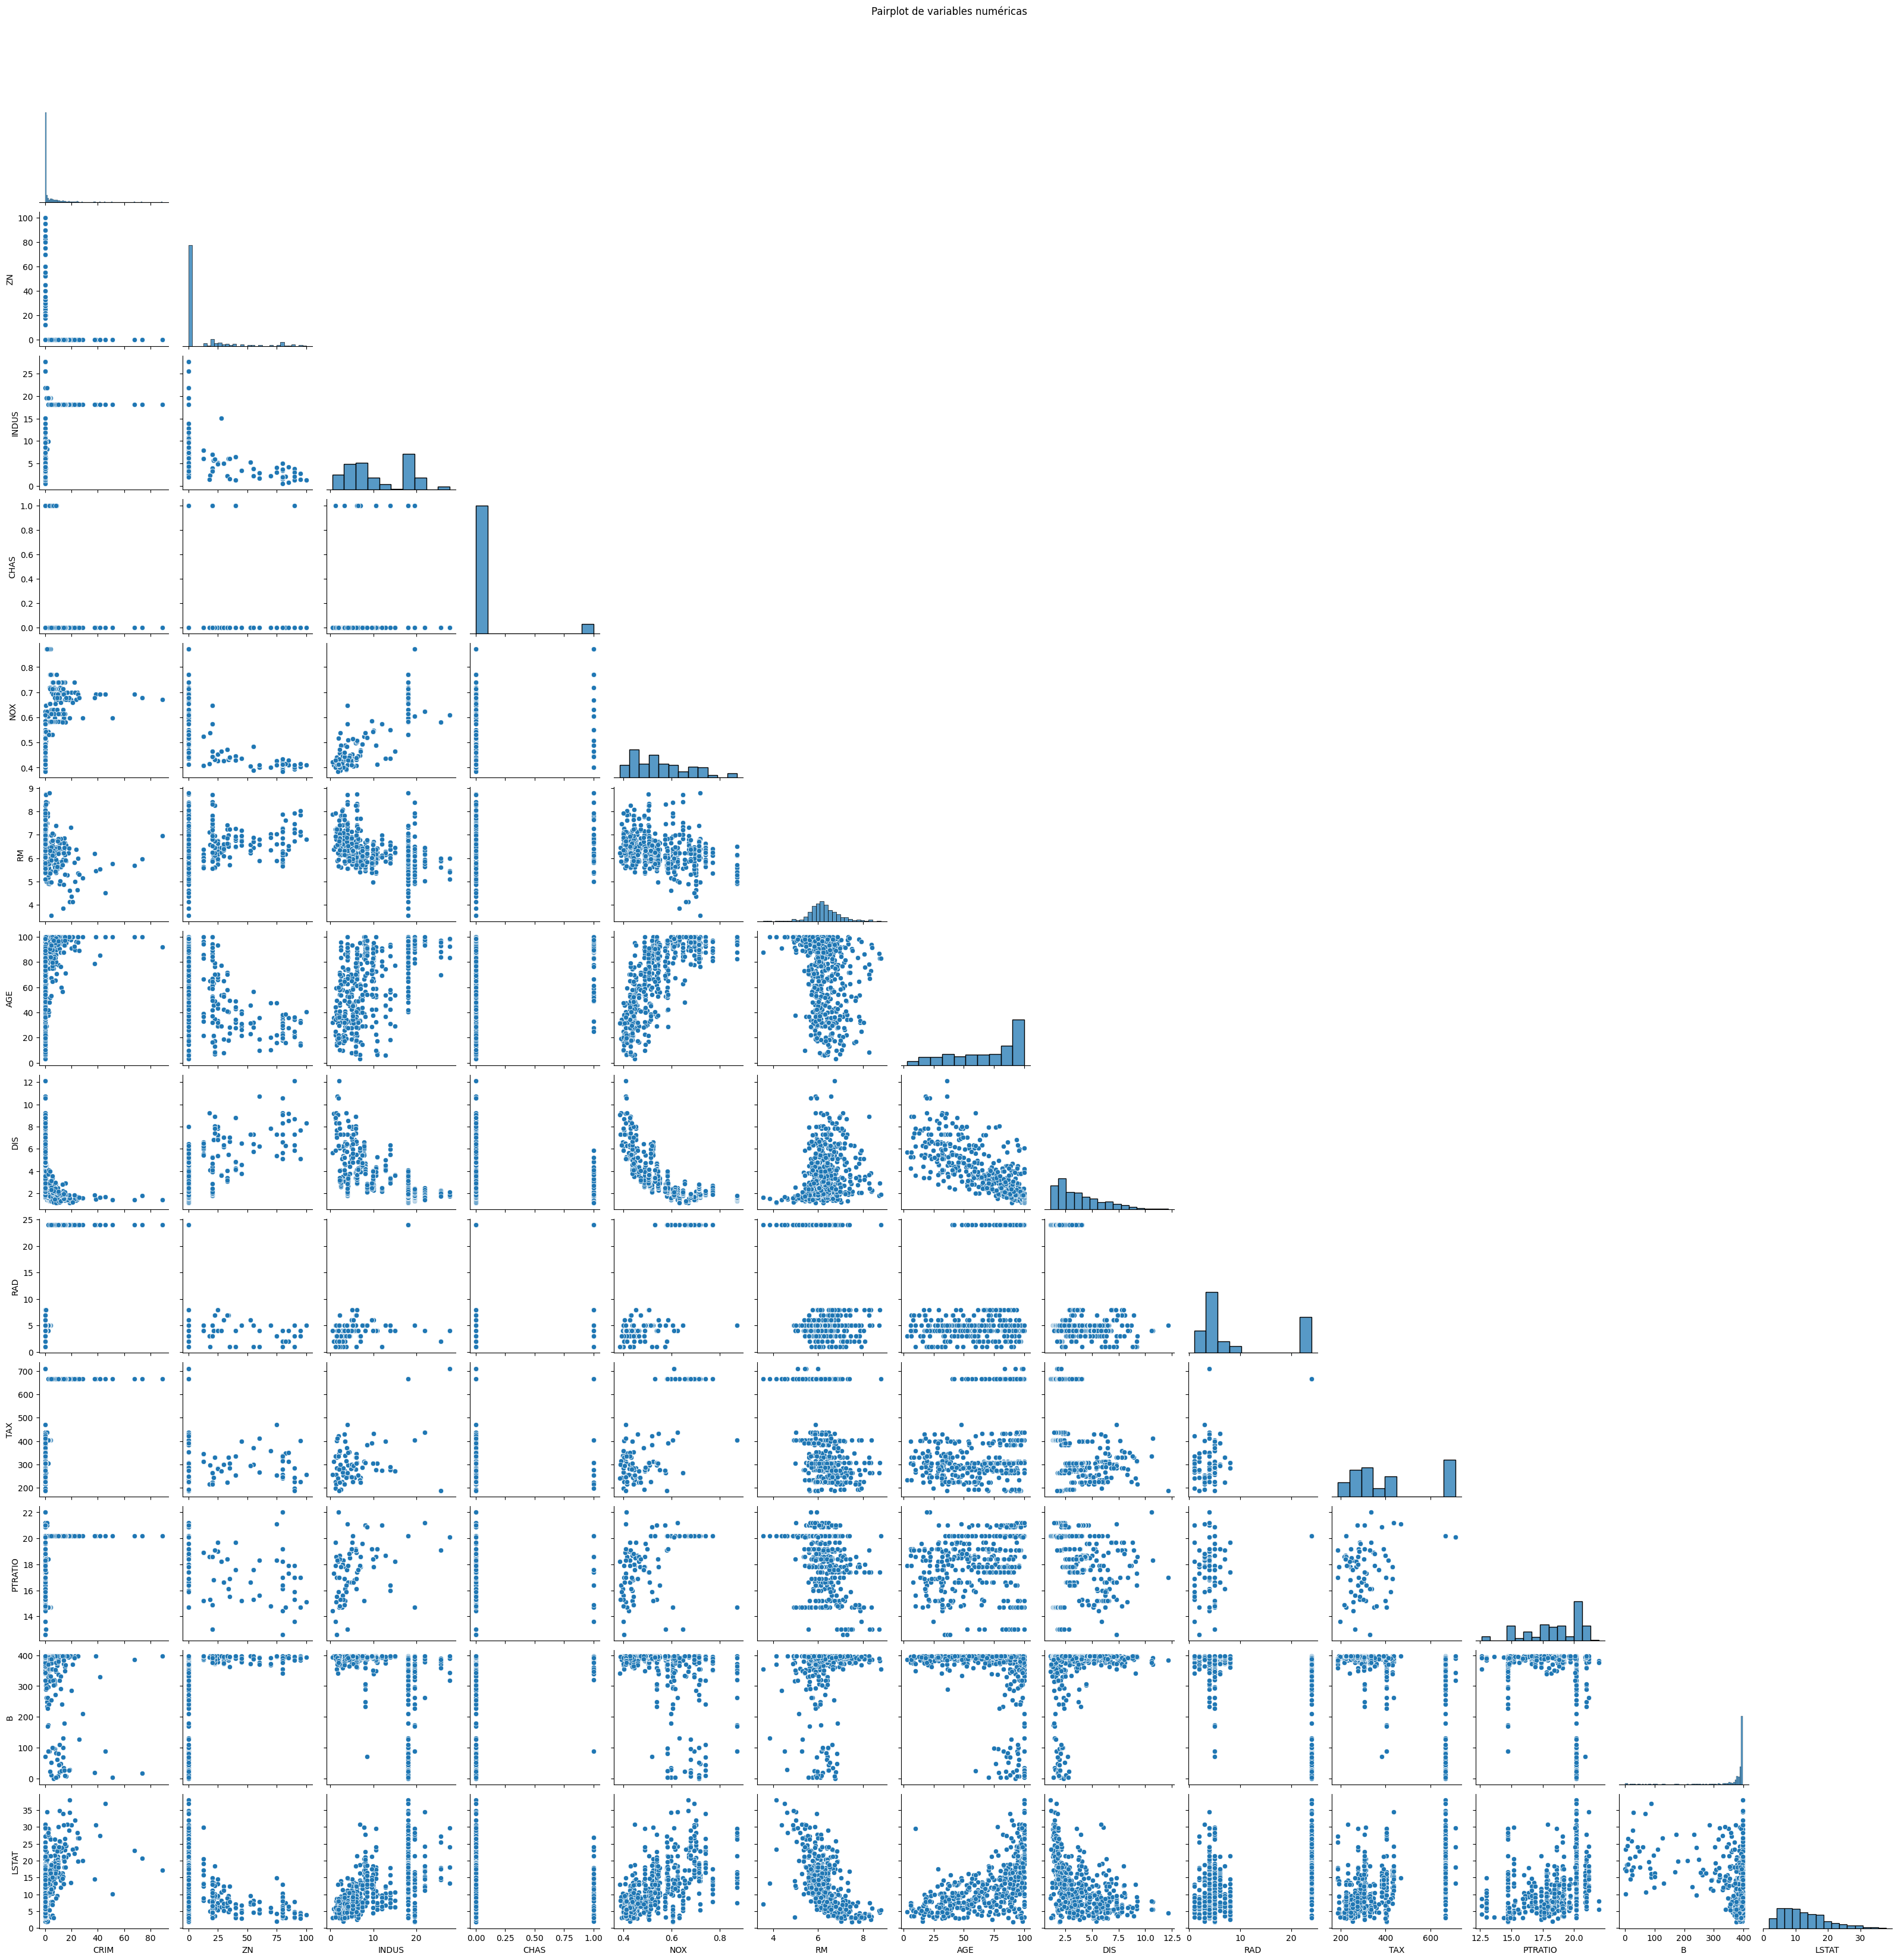

In [58]:
# Seleccionar solo las variables numéricas excepto la respuesta
variables_numericas = df.drop(columns=["MEDV"])

# Crear el pairplot
sns.pairplot(variables_numericas, corner=True, diag_kind="hist")

plt.suptitle("Pairplot de variables numéricas", y=1.02)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


In [56]:
cor = df.corr()["MEDV"].drop("MEDV")
cor_abs = cor.abs().sort_values(ascending=False)

# 2 más fuertes
top_2 = cor_abs.head(2).index.tolist()
# 2 más débiles
bottom_2 = cor_abs.tail(2).index.tolist()

print("Atributos con MAYOR correlación:", top_2)
print("Atributos con MENOR correlación:", bottom_2)

Atributos con MAYOR correlación: ['LSTAT', 'RM']
Atributos con MENOR correlación: ['DIS', 'CHAS']


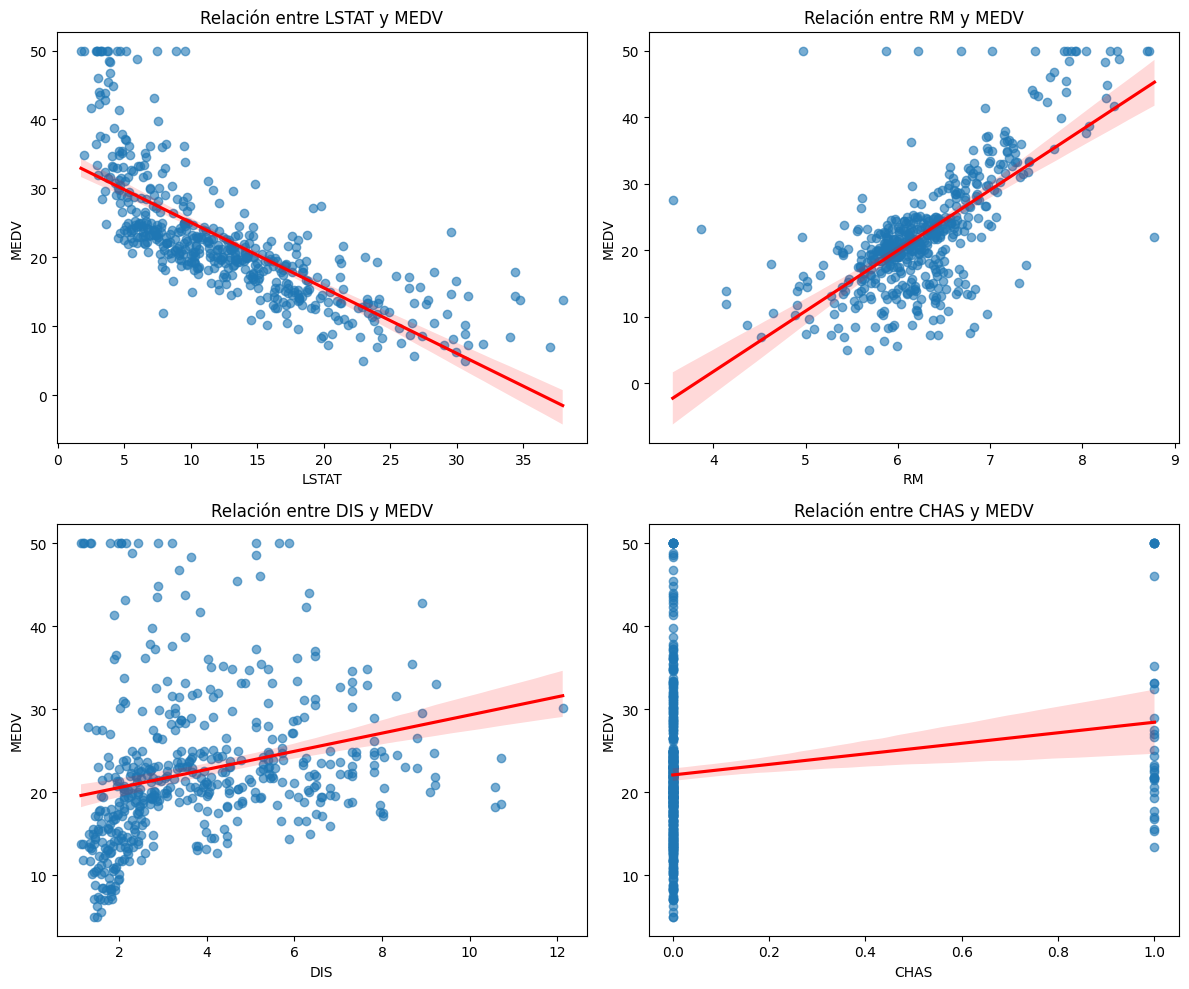

In [57]:
# Graficos

atributos = top_2 + bottom_2
plt.figure(figsize=(12, 10))

for i, col in enumerate(atributos):
    plt.subplot(2, 2, i+1)
    sns.regplot(x=df[col], y=df["MEDV"], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f"Relación entre {col} y MEDV")
    plt.xlabel(col)
    plt.ylabel("MEDV")

plt.tight_layout()
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


En los gráficos si se logra observar las correlaciones fuertes y débiles identificadas numéricamente. Las variables con alta correlación, como LSTAT y RM, muestran tendencias bien definidas con MEDV, mientras que las de correlación baja, como DIS y CHAS, presentan una dispersión sin una dirección clara, lo que confirma su relación débil con la respuesta.

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


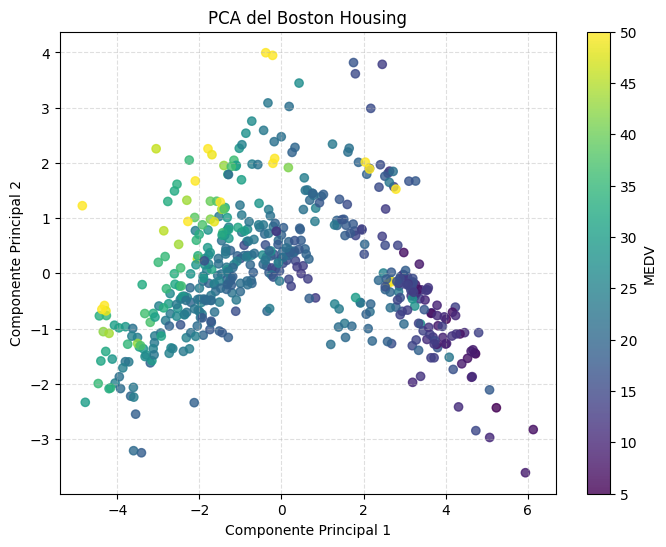

In [63]:
# Preparación de datos para PCA

# Atributos explicativos
X = df.drop(columns=["MEDV"])

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con 2 componentes

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["MEDV"] = df["MEDV"]

# Gráfico PCA

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    c=pca_df["MEDV"],
    cmap="viridis",
    alpha=0.8
)

plt.colorbar(scatter, label="MEDV")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA del Boston Housing")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


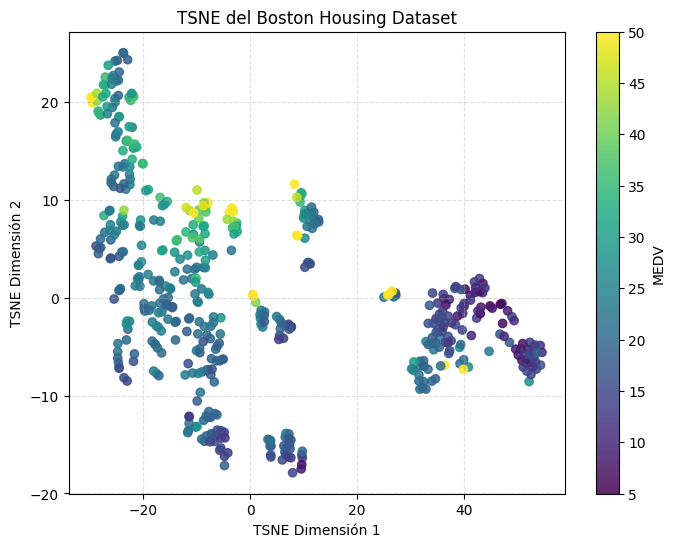

In [66]:
# Preparación de datos para TSNE
# Atributos explicativos
X = df.drop(columns=["MEDV"])

# Normalización
X_scaled = scaler.fit_transform(X)

# Aplicar TSNE con 2 componentes

tsne = TSNE(
    n_components=2,
    learning_rate=200,
    perplexity=30,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
tsne_df["MEDV"] = df["MEDV"]

# Gráfico TSNE

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    tsne_df["TSNE1"],
    tsne_df["TSNE2"],
    c=tsne_df["MEDV"],
    cmap="viridis",
    alpha=0.85
)

plt.colorbar(scatter, label="MEDV")
plt.xlabel("TSNE Dimensión 1")
plt.ylabel("TSNE Dimensión 2")
plt.title("TSNE del Boston Housing Dataset")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


Comparando los dos gráficos, se observa que PCA genera una representación más continua, pero no separa claramente las viviendas de precios altos y bajos, porque es un método lineal que solo captura la variabilidad global. En cambio, TSNE sí muestra grupos más diferenciados y permite visualizar mejor cómo se distribuye MEDV.

Si usáramos solo dos dimensiones para predecir MEDV, PCA funcionaría mejor, porque conserva la estructura del espacio original, mientras que TSNE distorsiona las distancias y no está diseñado para modelos predictivos.

Las diferencias entre ambos métodos se deben a que PCA captura relaciones lineales globales, mientras que TSNE se enfoca en patrones locales para visualización.

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, respectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [85]:
# División en train-test
# Variables predictoras
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 8)

# Revisión las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print("Dimensiones X_train:", X_train.shape)
print("Dimensiones X_test:", X_test.shape)
print("Dimensiones y_train:", y_train.shape)
print("Dimensiones y_test:", y_test.shape)

Dimensiones de los conjuntos de datos:
Dimensiones X_train: (404, 13)
Dimensiones X_test: (102, 13)
Dimensiones y_train: (404,)
Dimensiones y_test: (102,)


In [86]:
# Definir y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Mostrar intercepto
print("\nIntercepto (b):", modelo.intercept_)

# Mostrar coeficientes asociados a cada variable
print("Coeficientes del modelo:")
for nombre, coef in zip(X.columns, modelo.coef_):
    print(f"{nombre}: {coef}")



Intercepto (b): 34.95406014799107
Coeficientes del modelo:
CRIM: -0.11125492760176048
ZN: 0.05186804330220583
INDUS: 0.014332166738543898
CHAS: 2.5115405015723486
NOX: -14.926517959970592
RM: 3.934832384678313
AGE: -0.004645704292421859
DIS: -1.518442780336922
RAD: 0.28711059218431273
TAX: -0.011214466377748325
PTRATIO: -0.9340722133788866
B: 0.008326908584309612
LSTAT: -0.5599479177967356


In [87]:
# Validación cruzada con R2 y MAE
# R2
r2_scores = cross_val_score(
    modelo, X_train, y_train,
    cv=5,
    scoring="r2"
)

# MAE (sklearn devuelve su versión negativa: neg_mean_absolute_error)
mae_scores = -cross_val_score(
    modelo, X_train, y_train,
    cv=5,
    scoring="neg_mean_absolute_error"
)

print("R2 por fold:", r2_scores)
print("MAE por fold:", mae_scores)

R2 por fold: [0.69456756 0.75666502 0.78747275 0.62715533 0.61092493]
MAE por fold: [3.79481773 3.81978245 3.04310446 3.79130167 2.82738229]


In [90]:
# Media y desviación estándar
print("R2 promedio:", np.mean(r2_scores))
print("R2 desviación estándar:", np.std(r2_scores))

print("\nMAE promedio:", np.mean(mae_scores))
print("MAE desviación estándar:", np.std(mae_scores))

R2 promedio: 0.695357119131998
R2 desviación estándar: 0.06931789111150459

MAE promedio: 3.4552777196984046
MAE desviación estándar: 0.430163383996056


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [92]:
# Atributos explicativos
X_original = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# PCA a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear dataframe con las dos componentes
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

In [94]:
# División en train-test usando PCA
X_train, X_test, y_train, y_test = train_test_split(df_pca,y,test_size=0.2,random_state=8)

# Revisión las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print("Dimensiones X_train:", X_train.shape)
print("Dimensiones X_test:", X_test.shape)
print("Dimensiones y_train:", y_train.shape)
print("Dimensiones y_test:", y_test.shape)

Dimensiones de los conjuntos de datos:
Dimensiones X_train: (404, 2)
Dimensiones X_test: (102, 2)
Dimensiones y_train: (404,)
Dimensiones y_test: (102,)


In [95]:
# Definir y ajustar modelo Linear Regression (con PCA)
modelo_pca = LinearRegression()
modelo_pca.fit(X_train, y_train)

print("\nIntercepto (b):", modelo_pca.intercept_)
print("Coeficientes del modelo (PC1, PC2):")
for nombre, coef in zip(df_pca.columns, modelo_pca.coef_):
    print(f"{nombre}: {coef}")


Intercepto (b): 22.71421295688301
Coeficientes del modelo (PC1, PC2):
PC1: -2.3134653779060863
PC2: 2.012934788701354


In [96]:
# Validación cruzada (R² y MAE)
# R2
r2_scores_pca = cross_val_score(
    modelo_pca, X_train, y_train,
    cv=5,
    scoring="r2"
)

# MAE
mae_scores_pca = -cross_val_score(
    modelo_pca, X_train, y_train,
    cv=5,
    scoring="neg_mean_absolute_error"
)

print("R2 por fold:", r2_scores_pca)
print("MAE por fold:", mae_scores_pca)


R2 por fold: [0.45707115 0.50283591 0.55831715 0.2624862  0.07338723]
MAE por fold: [5.04293694 5.36691117 4.47589969 5.6165103  4.70616064]


In [97]:
# Media y desviación estándar

print("R2 promedio:", np.mean(r2_scores_pca))
print("R2 desviación estándar:", np.std(r2_scores_pca))

print("\nMAE promedio:", np.mean(mae_scores_pca))
print("MAE desviación estándar:", np.std(mae_scores_pca))


R2 promedio: 0.3708195267318685
R2 desviación estándar: 0.1790112327909586

MAE promedio: 5.041683747830609
MAE desviación estándar: 0.41686625471274497


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


El modelo funciona mucho mejor con el dataset original que con el conjunto reducido a solo 2 componentes PCA, esto se observa debido a que:

- El R² promedio con datos originales (≈ 0.69) es bastante mayor que el obtenido con PCA (≈ 0.37).

- El MAE promedio también es menor en el modelo con todas las variables (≈ 3.45) que con PCA (≈ 5.04).

Esto tiene sentido porque al aplicar PCA estamos reduciendo 13 variables a solo 2, perdiendo una cantidad importante de información útil para predecir MEDV. Aunque PCA conserva la mayor varianza posible en dos dimensiones, no logra capturar toda la complejidad del precio de las viviendas.

Además, el resultado está alineado con lo observado en el ejercicio 3, donde vimos que varias variables como RM, LSTAT, NOX o PTRATIO tienen relaciones fuertes con el precio. Al comprimirse todas esas relaciones en solo dos componentes, el modelo pierde capacidad predictiva.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [107]:
# Dataset ORIGINAL (mejor modelo)
X_orig = df.drop(columns=["MEDV"])
y = df["MEDV"]

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y, test_size=0.2, random_state=8)

# Entrenar el modelo con los datos ORIGINALES
modelo_orig = LinearRegression()
modelo_orig.fit(X_train_orig, y_train_orig)

# Generar predicciones sobre el test ORIGINAL
y_pred_orig = modelo_orig.predict(X_test_orig)

# Calcular R2 y MAE en test
r2_test = r2_score(y_test_orig, y_pred_orig)
mae_test = mean_absolute_error(y_test_orig, y_pred_orig)

print("Resultados en el conjunto de test:")
print("R2 en test:", r2_test)
print("MAE en test:", mae_test)


Resultados en el conjunto de test:
R2 en test: 0.7079627967134546
MAE en test: 3.368941892764696


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Para un ejecutivo de una inmobiliaria, la métrica más adecuada es MAE.
El MAE indica directamente cuántos miles de dólares se está equivocando el modelo en promedio, lo cual es intuitivo, fácil de comunicar y útil para tomar decisiones de negocio. Un ejecutivo puede interpretar fácilmente frases como “nuestro error promedio es de 3.36 mil dólares por vivienda”.

En cambio, para un analista matemático, la métrica más apropiada es R².
R² describe qué proporción de la variabilidad del precio está siendo explicada por el modelo, permite comparar modelos formalmente y evaluar la calidad del ajuste desde un punto de vista estadístico. Además, es una métrica estándar en evaluación de modelos de regresión.

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [108]:
# Separación de variables para clasificar CHAS
X = df.drop(columns=["CHAS"])   # Variables predictoras
y = df["CHAS"]                  # Variable objetivo

# División en train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# Revisión las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print("Dimensiones X_train:", X_train.shape)
print("Dimensiones X_test:", X_test.shape)
print("Dimensiones y_train:", y_train.shape)
print("Dimensiones y_test:", y_test.shape)

Dimensiones de los conjuntos de datos:
Dimensiones X_train: (404, 13)
Dimensiones X_test: (102, 13)
Dimensiones y_train: (404,)
Dimensiones y_test: (102,)


In [112]:
# Definir modelo K-Means
# K-means con 2 clusters porque CHAS solo tiene valores 0 y 1
kmeans = KMeans(n_clusters=2, random_state=8)

kmeans.fit(X_train)

# Predicciones de K-means
y_pred_raw = kmeans.predict(X_test)
train_clusters = kmeans.predict(X_train)

cluster_mapping = {}

for cluster in [0, 1]:
    mask = (train_clusters == cluster)
    majority_label = y_train[mask].mode()[0]
    cluster_mapping[cluster] = majority_label

y_pred = np.array([cluster_mapping[c] for c in y_pred_raw])

# Métricas: precisión, sensibilidad y F1-score
accuracy = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Resultados del modelo K-means:")
print("Precisión:", accuracy)
print("Sensibilidad:", sensibilidad)
print("F1-score:", f1)

Resultados del modelo K-means:
Precisión: 0.9117647058823529
Sensibilidad: 0.0
F1-score: 0.0


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [113]:
# Variables predictoras sin CHAS
X = df.drop(columns=["CHAS"])
y = df["CHAS"]

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame con PC1 y PC2
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=8)

# Revisión las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print("Dimensiones X_train:", X_train.shape)
print("Dimensiones X_test:", X_test.shape)
print("Dimensiones y_train:", y_train.shape)
print("Dimensiones y_test:", y_test.shape)

Dimensiones de los conjuntos de datos:
Dimensiones X_train: (404, 2)
Dimensiones X_test: (102, 2)
Dimensiones y_train: (404,)
Dimensiones y_test: (102,)


In [115]:
# K-means con 2 clusters (CHAS = 0 y 1)
kmeans_pca = KMeans(n_clusters=2, random_state=8)

kmeans_pca.fit(X_train)

# Predicciones
y_pred_raw = kmeans_pca.predict(X_test)
train_clusters = kmeans_pca.predict(X_train)

cluster_mapping = {}

for cluster in [0, 1]:
    mask = (train_clusters == cluster)
    majority_label = y_train[mask].mode()[0]
    cluster_mapping[cluster] = majority_label

y_pred = np.array([cluster_mapping[c] for c in y_pred_raw])

accuracy = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred)    # CHAS = 1
f1 = f1_score(y_test, y_pred)

print("Resultados del modelo K-means con PCA (2 dimensiones):")
print("Precisión:", accuracy)
print("Sensibilidad:", sensibilidad)
print("F1-score:", f1)


Resultados del modelo K-means con PCA (2 dimensiones):
Precisión: 0.9117647058823529
Sensibilidad: 0.0
F1-score: 0.0


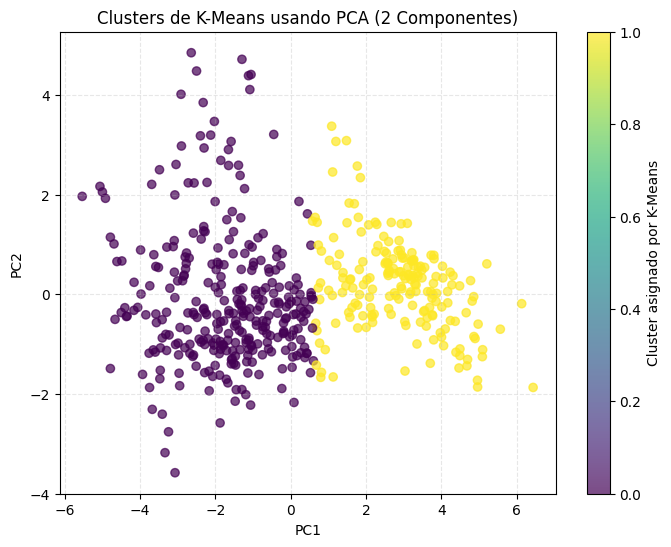

In [116]:
# Gráfico
clusters_full = kmeans_pca.predict(df_pca)

plt.figure(figsize=(8,6))

scatter = plt.scatter(
    df_pca["PC1"],
    df_pca["PC2"],
    c=clusters_full,
    cmap="viridis",
    alpha=0.7
)

plt.colorbar(scatter, label="Cluster asignado por K-Means")
plt.title("Clusters usando PCA (2 Componentes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


Para un ejecutivo, usaría precisión, porque le interesa saber cuántas veces el modelo acierta en general. Decirle “el modelo acierta el 91% de las veces” es claro y suficiente para decisiones de negocio.

Para un analista matemático, usaría sensibilidad y F1-score, porque revelan el verdadero problema: el modelo no detecta ninguna vivienda junto al río (recall = 0, F1 = 0), lo que indica que no discrimina bien entre clases.

El modelo es mejor acertando que discriminando. Esto significa que obtiene una precisión alta, pero no distingue correctamente entre las casas que están cerca del río (CHAS=1) y las que no (CHAS=0).

En otras palabras, acierta mucho porque predice casi siempre la clase mayoritaria (CHAS=0), pero no identifica correctamente los casos CHAS=1, por eso la sensibilidad y el F1-score son 0.